# Question 2: If the frog can now jump to any lilypad, forwards or backwards, with equal probability, what is the average number of jumps it takes for any given amount of lilypads?

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

In [50]:
# maximum number of lily pads, plus one!!!!  In other words, n = 1 corresponds to zero lily
# pads.  The point here is that all of the sums/formulas/etc. always go up to n+1, so let's
# just rescale the problem 

nmax = 30

In [51]:
random.seed(1)

In [52]:
# some variables to keep track of where the frog is, how many jumps he has taken for
# this iteration of the simulation, and how many total jumps he has taken across all
# iterations.
pos = 0
jumpsum = 0
total_jumps = 0

# how many times we will run the simulation
n_trys = 1000

# create some arrays to hold various quantities, as a function of n.  We want to
# run the simulation for n = 1 ... nmax
x = []
y = []
eval = [] # this will be used for intermediate steps in the recursion method
evalr = [] # this will be for the recursion method - it is just eval[] shifted by one, 
sigma = []

In [53]:
for npad in range(1,nmax+1): 

    if (npad == 1):
        eval.append(1)
        evalr.append(1)
    else:
        sum = 0.0
        for i in range(1,npad):
            sum = sum + 1.0/npad*(1.0+eval[npad-i-1])
        sum = sum + 1.0/npad
        eval.append(sum)
        evalr.append(eval[npad-1])
    print("Theory: ",npad,eval[npad-1],evalr[npad-1])
    
    x.append(npad)
    
    end = npad
    
    # simulate the process of getting across the stream n_trys times
    for j in range(n_trys):
        
        # main simulation loop
        while pos < npad:
            pos = int(random.uniform(1,end+1))
            jumpsum = jumpsum + 1
        
        # reset pos to zero, add to total jumps, reset jumpsum
        pos = 0
        total_jumps = total_jumps + jumpsum
        jumpsum = 0
    
    #print (npad,total_jumps,n_trys)

    expectation_value = total_jumps/n_trys*1.0
    y.append(expectation_value)
    sigma.append(expectation_value*1/np.sqrt(n_trys))
    total_jumps = 0
    
    print ("Expectation value for n = %d is %f +/- %f" % (npad,expectation_value,expectation_value*1/np.sqrt(n_trys)))
    

Theory:  1 1 1
Expectation value for n = 1 is 1.000000 +/- 0.031623
Theory:  2 1.5 1.5
Expectation value for n = 2 is 1.970000 +/- 0.062297
Theory:  3 1.8333333333333333 1.8333333333333333
Expectation value for n = 3 is 3.051000 +/- 0.096481
Theory:  4 2.083333333333333 2.083333333333333
Expectation value for n = 4 is 4.057000 +/- 0.128294
Theory:  5 2.2833333333333337 2.2833333333333337
Expectation value for n = 5 is 5.035000 +/- 0.159221
Theory:  6 2.4499999999999997 2.4499999999999997
Expectation value for n = 6 is 6.093000 +/- 0.192678
Theory:  7 2.5928571428571425 2.5928571428571425
Expectation value for n = 7 is 6.871000 +/- 0.217280
Theory:  8 2.7178571428571425 2.7178571428571425
Expectation value for n = 8 is 7.502000 +/- 0.237234
Theory:  9 2.8289682539682537 2.8289682539682537
Expectation value for n = 9 is 8.713000 +/- 0.275529
Theory:  10 2.928968253968254 2.928968253968254
Expectation value for n = 10 is 9.599000 +/- 0.303547
Theory:  11 3.0198773448773446 3.0198773448773

[ 1.00975395 -0.14051954]


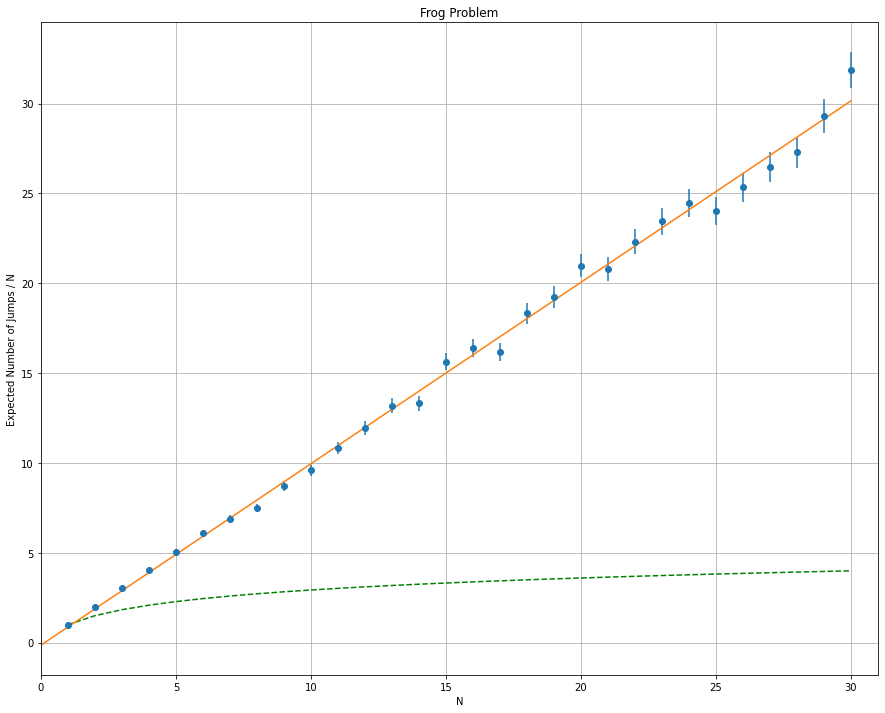

In [54]:
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.errorbar(x,y,yerr=sigma,fmt='o')
#ax1.plot(x,evalr,'r--')
ax1.plot(x,eval,'g--')

ax1.set_title("Frog Problem")
ax1.set_xlabel('N')
ax1.set_ylabel('Expected Number of Jumps / N')
ax1.set_xlim(0,nmax+1)
ax1.grid(True)

# Best fit line for data
z = np.polyfit(x,y,1)
zx = np.linspace(0,30)
zy = z[0]*zx + z[1]
plt.plot(zx,zy)
print(z)

# This is very surprising! The best fit line has a slope of nearly 1, and a y-intercept close to 0, so it seems the average number of jumps increases linearly, and in fact almost 1 to 1 with the number of lilypads. So while we do end up with much more jumps, it is seemingly a good approximation to just say it will take the same amount of jumps as lilypads to get to the end. 

In [55]:
# simulation for only N = 30
jumps = []

for j in range(n_trys):
        
        # main simulation loop
        while pos < nmax+1:
            pos = int(random.uniform(1,nmax+2))
            jumpsum = jumpsum + 1
        
        jumps.append(jumpsum)
        # reset pos to zero, add to total jumps, reset jumpsum
        pos = 0
        total_jumps = total_jumps + jumpsum
        jumpsum = 0

[6.93828694e-04 3.08834326e+01]


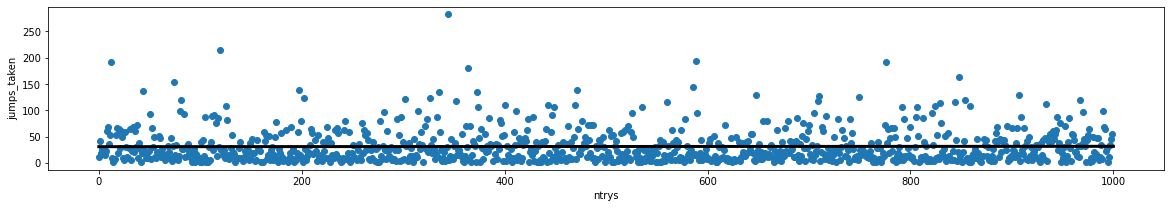

In [66]:
plt.rcParams["figure.figsize"] = (20,3)
plt.scatter(range(n_trys), jumps)
plt.xlabel('ntrys')
plt.ylabel('jumps_taken')

# Best fit line for data of N = 30
z2 = np.polyfit(range(n_trys),jumps,1)
zx2 = np.linspace(0,1000)
zy2 = z2[0]*zx2 + z2[1]
plt.plot(zx2,zy2,color='black', linewidth=3)

print(z2)

# Here we can see that for 30 lilypads, the best fit line has essentially zero slope, and a y-intercept of ~30.8. This supports the previous simulation as this is almost the same number of average jumps as there are lilypads.